In [1]:
using CovidSim

┌ Info: Precompiling CovidSim [top-level]
└ @ Base loading.jl:1278


In [2]:
using DelimitedFiles
using DataFrames
using Plots
using Dates
using Printf
pyplot()

Plots.PyPlotBackend()

## Comparing Simulation to Johns Hopkins Reported Data
### Seattle (Really, King County)

In [233]:
jhcases,jhfirst, jhlast = get_real_data()
jhdead, _, _ = get_real_data(series="dead")

(dat = (dat = Any[1001.0 "Autauga, Alabama, US" … 22 22; 1003.0 "Baldwin, Alabama, US" … 29 29; … ; 56043.0 "Washakie, Wyoming, US" … 0 0; 56045.0 "Weston, Wyoming, US" … 0 0], first = CovidSim.Col_ref("1/22/20", 3), last = CovidSim.Col_ref("8/14/20", 208)), first = first, last = last)

In [234]:
n = jhcases.last.col - jhcases.first.col + 1; println(jhcases.first, " ", jhcases.last); println(n)

CovidSim.Col_ref("1/22/20", 3) CovidSim.Col_ref("8/14/20", 208)
206


Get our locales.

In [235]:
seattle = (;fips=53033); newyork=(;fips=36061); bismarck=(;fips=38015); 

In [236]:
sea = loc2df(confdat=jhcases.dat, deaddat=jhdead.dat, loc=seattle.fips)
rename!(sea, [:sea_infected, :sea_dead])
nyc = loc2df(confdat=jhcases.dat, deaddat=jhdead.dat, loc=newyork.fips)
rename!(nyc, [:nyc_infected, :nyc_dead])
bis = loc2df(confdat=jhcases.dat, deaddat=jhdead.dat, loc=bismarck.fips)
rename!(bis, [:bis_infected, :bis_dead])
tricities = hcat(sea, nyc, bis)

,sea_infected,sea_dead,nyc_infected,nyc_dead,bis_infected,bis_dead
,Any,Any,Any,Any,Any,Any
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
5,1,0,0,0,0,0
6,1,0,0,0,0,0
7,1,0,0,0,0,0
8,1,0,0,0,0,0
9,1,0,0,0,0,0


In [237]:
dt = CovidSim.setup_dt("../parameters/dec_tree_all.csv");

## Run a simulation for King County (Seattle)

In [728]:
seed_1_6 = seed_case_gen(1, [0,3,3,0,0], 1, nil, agegrps)

(::CovidSim.var"#scase#85"{Int64,Array{Int64,1},Int64,Int64,UnitRange{Int64}}) (generic function with 1 method)

In [729]:
alldict, env, series = run_a_sim(n, seattle.fips, showr0=true, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[],
       runcases=[seed_1_6]);

*** seed day 1 locale 53033....
at day 10 r0 = 1.54
at day 20 r0 = 1.54
at day 30 r0 = 1.53
at day 40 r0 = 1.48
at day 50 r0 = 1.53
at day 60 r0 = 1.45
at day 70 r0 = 1.44
at day 80 r0 = 1.2
at day 90 r0 = 0.8
at day 100 r0 = 0.45
at day 110 r0 = 0.38
at day 120 r0 = 0.36
at day 130 r0 = 0.36
at day 140 r0 = 0.38
at day 150 r0 = 0.37
at day 160 r0 = 0.36
at day 170 r0 = 0.38
at day 180 r0 = 0.37
at day 190 r0 = 0.39
at day 200 r0 = 0.33


In [730]:
geo = alldict["geo"]

15×10 Array{Any,2}:
  6075  "San Francisco"  "San Francisco"  …  2020-02-15  1.04109
 53033  "Seattle"        "Seattle"           2020-03-15  0.931603
 36061  "New York"       "New York"          2020-03-15  1.25
 39035  "Cuyahoga"       "Cleveland"         2020-03-15  0.912462
 48113  "Dallas"         "Dallas"            2020-03-15  0.920954
 39151  "Stark"          "Canton"         …  2020-03-15  0.9
 34013  "Essex"          "Newark"            2020-03-15  0.942669
 13089  "DeKalb"         "Atlanta"           2020-03-15  0.909244
 17167  "Sangamon"       "Springfield"       2020-03-15  0.900535
 38015  "Burleigh"       "Bismarck"          2020-03-15  0.904251
  4013  "Maricopa"       "Phoenix"        …  2020-03-25  0.91006
 42003  "Allegheny"      "Pittsburgh"        2020-03-25  0.934195
 27053  "Hennepin"       "Minneapolis"       2020-03-25  0.955584
 31055  "Douglas"        "Omaha"             2020-03-25  0.915317
  8031  "Denver"         "Denver"            2020-03-25  0.925667

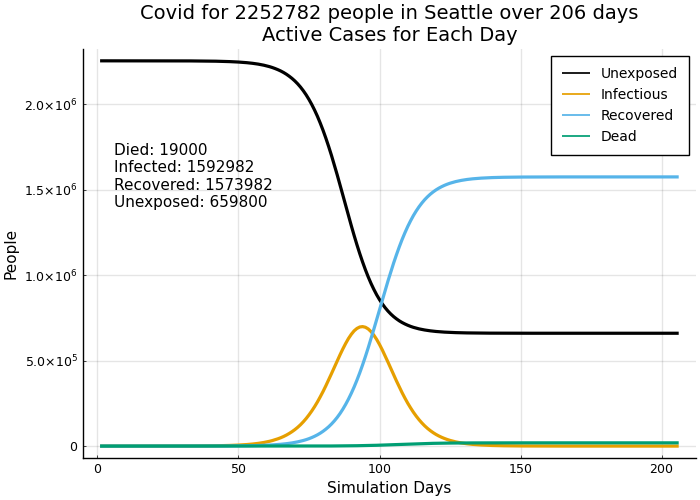

In [731]:
cumplot(series,seattle.fips,geo=geo)

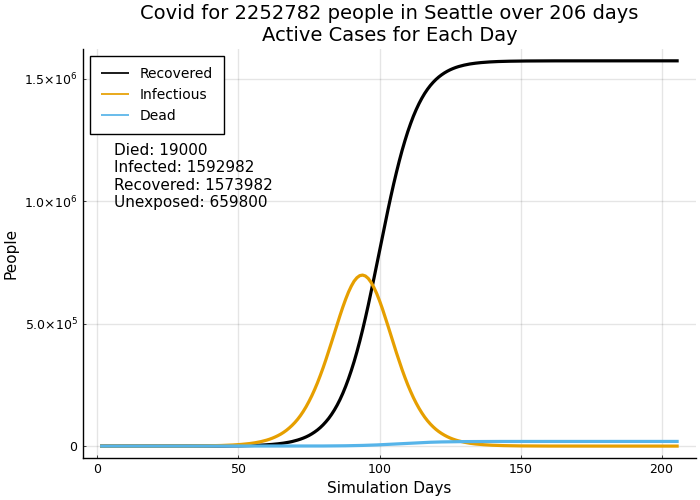

In [732]:
cumplot(series,seattle.fips,[recovered, infectious, dead],geo=geo)

#### Outcome Fraction

In [733]:
sea_outcome = virus_outcome(series, seattle.fips, base=:pop)
for k in keys(sea_outcome)
    @printf("%-12s %f\n", k, sea_outcome[k])
end

unexposed    0.292883
dead         0.008434
recovered    0.698683
totinfected  0.707117


## Let's put some moderate social distancing in place around March 23
This reduces R0 from around 2.0 to around 1.2. Still, some growth but much slower...

In [768]:
str_50 = sd_gen(start=50, comply=.85, cf=(.2,1.1), tf=(.18,.41))

(::CovidSim.var"#sd_mod#97"{CovidSim.var"#sd_mod#96#98"{Int64,Float64,Tuple{Float64,Float64},Tuple{Float64,Float64}}}) (generic function with 1 method)

In [769]:
alldict, env, series = run_a_sim(n, seattle.fips, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[str_50],
       runcases=[seed_1_6]);

*** seed day 1 locale 53033....


In [770]:
sim_r0(env, alldict["dt"], alldict["decpoints"])

0.67

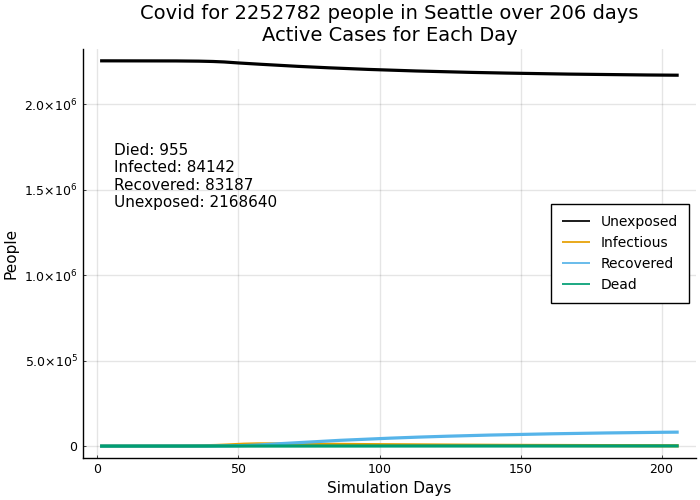

In [771]:
cumplot(series,seattle.fips,geo=geo)

## What is the difference between active cases and reported cases?

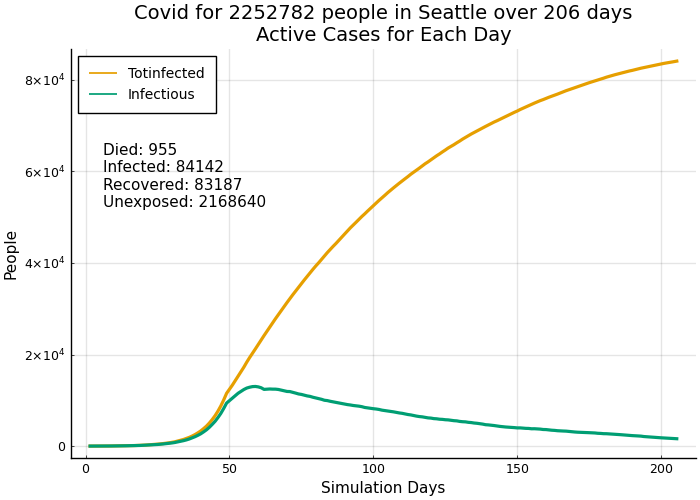

In [772]:
cumplot(series,seattle.fips,[totinfected, infectious], geo=geo)

#### What's going on here?
Infectious shows the *active* cases: the people on each day who are, on that day, actively infected. People who have recovered or (sadly) have died are not included--they're not infected any more.

Totinfected shows the cumulative total of all the people who have ever become infected. This is what popular web dashboards and news sites show to depict growth and compare different places. Why don't they show *active* infected cases?  ...because they can't... They could subtract out the reported deaths, but that wouldn't make much difference, except in Italy or New York City. They don't know how many people have recovered because public health jurisdictions are challenged to accurately tracks this data.  When "anti-body" tests are reliably accurate and broadly available, then a few jurisdictions may begin to sample the population with anti-body tests. But, that is looking quite difficult because such tests are proving to be very unreliable. 

Total cumulative infected is easier to track, if not accurately, and easier to compare across locations. In the early stages of the spread of infection, it focuses on what everyone wants to know: is the virus growing and how fast is it growing.  It tends to exaggerate the state of things because the line goes up steeply and never goes down--it can only become flat. 

Active infected cases *will* go down and it shows the effect of so-called herd immunity: When there are many recovered and temporarily and partially immune people in the population, the virus spread slows down because there are fewer hosts available. Eventually, this will protect many other people as the spread becomes very slow and active virus in hosts dies out.

#### Align simulation and reported series on a day when equal numbers of deaths were reached

In [773]:
# target = 20
# sim_dead = Date("2020-01-22") + Day(findfirst(series[seattle.fips][:cum][:,map2series.dead[6]] .>= target))
# rpt_dead = Date("2020-01-22") + Day(findfirst(tricities[:, :sea_dead] .>= target))
# adjdays = Dates.value(sim_dead - rpt_dead)
# @show sim_dead, rpt_dead, adjdays

In [774]:
target = 6
sim_inf = Date("2020-01-22") + Day(findfirst(series[seattle.fips][:cum][:,map2series.totinfected[6]] .>= target))
rpt_inf = Date("2020-01-22") + Day(findfirst(tricities[:, :sea_infected] .>= target))
adjdays = Dates.value(sim_inf - rpt_inf)
@show sim_inf, rpt_inf, adjdays

(sim_inf, rpt_inf, adjdays) = (Date("2020-01-23"), Date("2020-03-01"), -38)


(Date("2020-01-23"), Date("2020-03-01"), -38)

In [775]:
println(Dates.value(rpt_inf - Date("2020-01-22")), " ", Dates.value(sim_inf - Date("2020-01-22")))

39 1


In [776]:
println(tricities[Dates.value(rpt_inf - Date("2020-01-22")),:sea_dead], " ", 
    series[seattle.fips][:cum][Dates.value(sim_inf - Date("2020-01-22")),map2series.dead[6]])

1 0


In [777]:
rundays = n + adjdays

168

In [784]:
alldict, env, series = run_a_sim(rundays, seattle.fips, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[str_50],
       runcases=[seed_1_6]);

*** seed day 1 locale 53033....


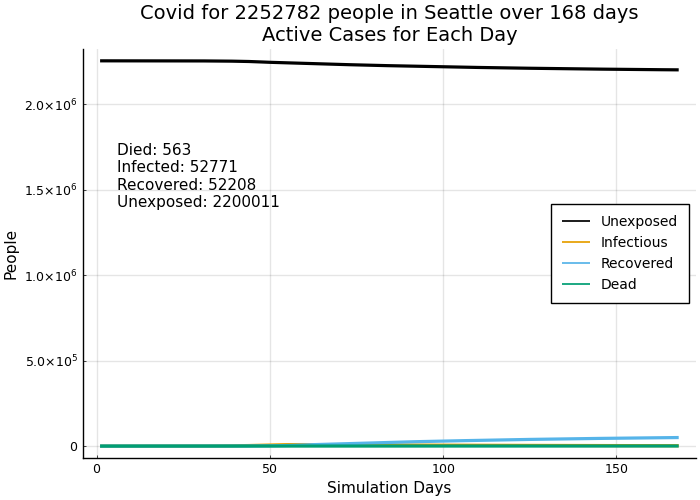

In [785]:
cumplot(series, seattle.fips, geo=alldict["geo"])

In [786]:

plotcases = if adjdays >= 0
    series[seattle.fips][:cum][1+adjdays:n+adjdays,map2series.totinfected[6]] # offset towards past (left)
else
    vcat(zeros(Int, abs(adjdays)),series[seattle.fips][:cum][1:rundays, map2series.totinfected[6]]) # offset to future and pad left with zeros
end

206-element Array{Int64,1}:
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     ⋮
 50926
 51117
 51291
 51477
 51651
 51828
 51981
 52137
 52303
 52458
 52613
 52768

#### Simulated vs. Reported Cases

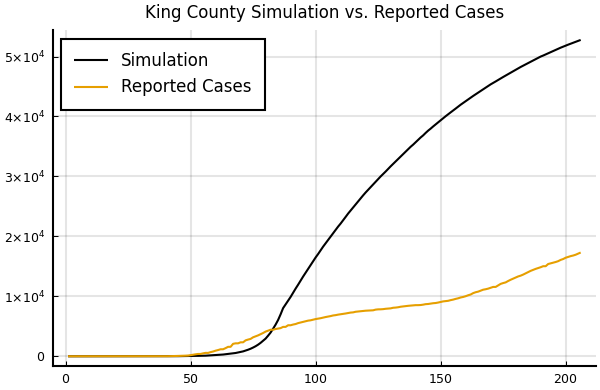

In [787]:
plot(1:n, plotcases, label="Simulation",dpi=150, size=(400,260), tickfontsize=6)
plot!(1:n, tricities[:,:sea_infected], label="Reported Cases",dpi=150, size=(400,260), tickfontsize=6)
title!("King County Simulation vs. Reported Cases", titlefontsize=8)


In [788]:

sea_outcome = virus_outcome(series, seattle.fips, base=:pop)
for k in keys(sea_outcome)
    @printf("%-12s %f\n", k, sea_outcome[k])
end

unexposed    0.976576
dead         0.000250
recovered    0.022195
totinfected  0.023424


In [789]:
sea_outcome = virus_outcome(series, seattle.fips, base=:none)
for k in keys(sea_outcome)
    @printf("%-12s %d\n", k, sea_outcome[k])
end

unexposed    2200011
dead         563
recovered    50000
totinfected  52768


## Which do you believe?
Is this plausible?  Let's think about it.  The simulation with social distancing results in about 91,000 cumulative total infected and 772 deaths for a death rate of 8 tenths of one percent. The reported results show only 6207 cumulative total infected and 447 deaths for a death rate of over 7%. 

Could we have unreported deaths in Seattle?  Even in the place with possibly the best and most honest approach to public health in the US, sure... Is it reasonable that Seattle's death rate is comparable to Italy's? Probably not. Let's split the difference on deaths and call it 600. Let's assume a moderately high death rate of 2%. This would mean Seattle really has 30,000 cases--so Seattle is underreporting by a factor of 5 and the simulation would be showing 3X the number cases rather than around 12X.

Even so, doesn't the simulation still seem too high?  The simulated infection rate is only at 4% of King County's population. That doesn't seem outrageous--in fact, it is probably still too low. The good news is that the real death rate is probably significantly lower than Seattle's reported death rate and King County is building towards "herd immunity" more rapidly than the reported cases would suggest.

This phenomenon is happening around the world with a respected article based estimating cases based on more accurate reported deaths. The article suggests that under-reporting in countries varies from 3X to more than 12X. 

In [790]:

plotdeaths = if adjdays >= 0
    series[seattle.fips][:cum][1+adjdays:n+adjdays,map2series.dead[6]] # offset towards past (left)
else
    vcat(zeros(Int, abs(adjdays)),series[seattle.fips][:cum][1:rundays, map2series.dead[6]]) # offset to future and pad left with zeros
end

206-element Array{Int64,1}:
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   ⋮
 517
 519
 525
 532
 538
 542
 546
 552
 555
 557
 558
 563

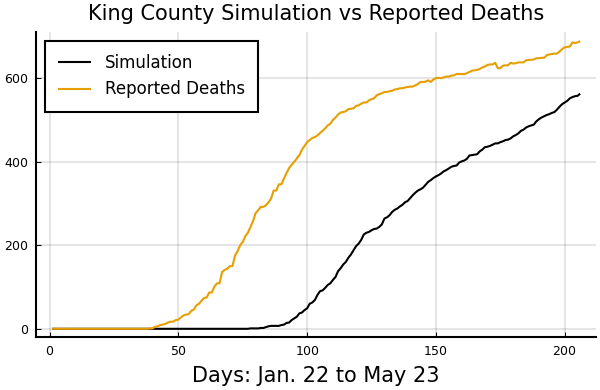

In [791]:
plot(1:n, plotdeaths, label="Simulation",dpi=150, size=(400,260), tickfontsize=6)
plot!(1:n, vcat(zeros(0),tricities[1:n-0, :sea_dead]), label="Reported Deaths",dpi=150, size=(400,260), tickfontsize=6)
title!("King County Simulation vs Reported Deaths", titlefontsize=10)
xlabel!("Days: Jan. 22 to May 23", guidefontsize=10)


# Virtual New York City

In [792]:
alldict, env, series = run_a_sim(n, newyork.fips, showr0=true, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[],
       runcases=[seed_1_6]);

*** seed day 1 locale 36061....
at day 10 r0 = 1.49
at day 20 r0 = 1.56
at day 30 r0 = 1.53
at day 40 r0 = 1.52
at day 50 r0 = 1.49
at day 60 r0 = 1.27
at day 70 r0 = 0.59
at day 80 r0 = 0.26
at day 90 r0 = 0.23
at day 100 r0 = 0.22
at day 110 r0 = 0.21
at day 120 r0 = 0.21
at day 130 r0 = 0.21
at day 140 r0 = 0.23
at day 150 r0 = 0.21
at day 160 r0 = 0.2
at day 170 r0 = 0.21
at day 180 r0 = 0.21
at day 190 r0 = 0.23
at day 200 r0 = 0.22


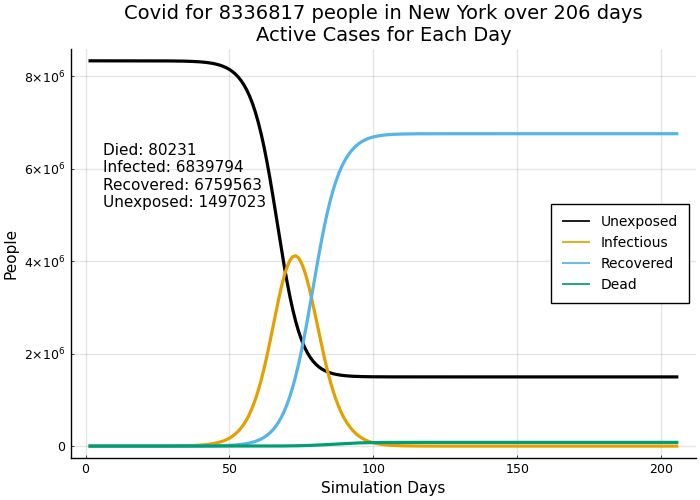

In [793]:
cumplot(series,newyork.fips,geo=geo)

Why does New York grow much faster than Seattle? Because it has a much higher population density.  The simulation uses population density as an input that influences the spread of the virus.

In [794]:
nyc_outcome = virus_outcome(series, newyork.fips, base=:pop)
for k in keys(nyc_outcome)
    @printf("%-12s %f\n", k, nyc_outcome[k])
end

unexposed    0.179568
dead         0.009624
recovered    0.810809
totinfected  0.820432


## Let's do some social distancing

In [795]:
str_45_nyc = sd_gen(start=45, comply=.9, cf=(.2, 1.1), tf=(.18,.40))
alldict, env, series = run_a_sim(n, newyork.fips, showr0=true, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[str_45_nyc],
       runcases=[seed_1_6]);

*** seed day 1 locale 36061....
at day 10 r0 = 1.5
at day 20 r0 = 1.5
at day 30 r0 = 1.46
at day 40 r0 = 1.52
at day 50 r0 = 0.59
at day 60 r0 = 0.57
at day 70 r0 = 0.56
at day 80 r0 = 0.54
at day 90 r0 = 0.53
at day 100 r0 = 0.5
at day 110 r0 = 0.48
at day 120 r0 = 0.5
at day 130 r0 = 0.47
at day 140 r0 = 0.44
at day 150 r0 = 0.41
at day 160 r0 = 0.44
at day 170 r0 = 0.42
at day 180 r0 = 0.43
at day 190 r0 = 0.44
at day 200 r0 = 0.44


In [796]:
nyc_outcome = virus_outcome(series, newyork.fips, base=:pop)
for k in keys(nyc_outcome)
    @printf("%-12s %f\n", k, nyc_outcome[k])
end

unexposed    0.740894
dead         0.003104
recovered    0.254108
totinfected  0.259106


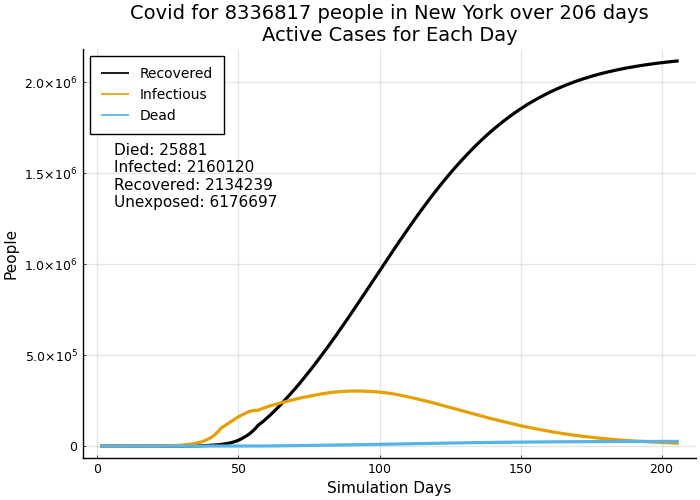

In [797]:
cumplot(series,newyork.fips,[recovered, infectious, dead], geo=geo)

## Compare Cumulative Total Infected to Active Infected

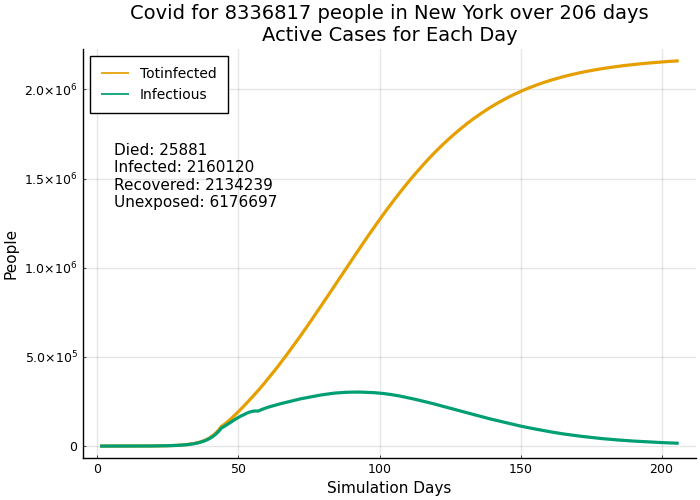

In [798]:
cumplot(series,newyork.fips,[totinfected, infectious], geo=geo)

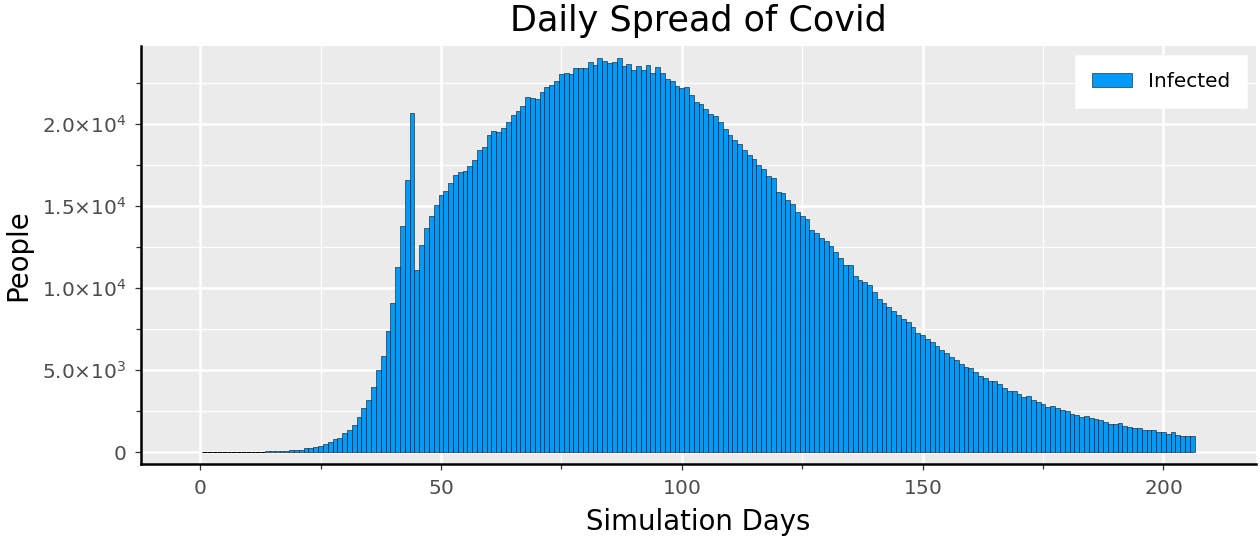

In [799]:
dayplot(spreadq)

#### Align simulation and reported series on the day when 50 deaths were reached

In [800]:
# sim_dead = Date("2020-01-22") + Day(findfirst(series[newyork.fips][:cum][:,map2series.dead[6]] .>= target))
# rpt_dead = Date("2020-01-22") + Day(findfirst(tricities[:, :nyc_dead] .>= target))
# adjdays = Dates.value(sim_dead - rpt_dead)
# @show sim_dead, rpt_dead, adjdays

In [801]:
sim_inf = Date("2020-01-22") + Day(findfirst(series[newyork.fips][:cum][:,map2series.dead[6]] .>= target))
rpt_inf = Date("2020-01-22") + Day(findfirst(tricities[:, :nyc_dead] .>= target))
adjdays = Dates.value(sim_inf - rpt_inf)
@show sim_inf, rpt_inf, adjdays

(sim_inf, rpt_inf, adjdays) = (Date("2020-02-29"), Date("2020-03-16"), -16)


(Date("2020-02-29"), Date("2020-03-16"), -16)

In [802]:
rundays = n + adjdays


190

In [803]:
alldict, env, series = run_a_sim(rundays, newyork.fips, showr0=true, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[str_45_nyc],
       runcases=[seed_1_6]);

*** seed day 1 locale 36061....
at day 10 r0 = 1.55
at day 20 r0 = 1.5
at day 30 r0 = 1.54
at day 40 r0 = 1.49
at day 50 r0 = 0.6
at day 60 r0 = 0.65
at day 70 r0 = 0.63
at day 80 r0 = 0.6
at day 90 r0 = 0.62
at day 100 r0 = 0.57
at day 110 r0 = 0.56
at day 120 r0 = 0.53
at day 130 r0 = 0.53
at day 140 r0 = 0.54
at day 150 r0 = 0.52
at day 160 r0 = 0.5
at day 170 r0 = 0.47
at day 180 r0 = 0.47
at day 190 r0 = 0.45


In [804]:
plotcases = if adjdays >= 0
    series[newyork.fips][:cum][1+adjdays:n+adjdays,map2series.totinfected[6]] # offset towards past (left)
else
    vcat(zeros(Int, abs(adjdays)),series[newyork.fips][:cum][1:rundays, map2series.totinfected[6]]) # offset to future and pad left with zeros
end

206-element Array{Int64,1}:
       0
       0
       0
       0
       0
       0
       0
       0
       0
       0
       0
       0
       0
       ⋮
 1621389
 1630849
 1640274
 1649432
 1658561
 1667427
 1675927
 1684268
 1692505
 1700554
 1708573
 1716189

### Simulation vs. Reported Total Cases

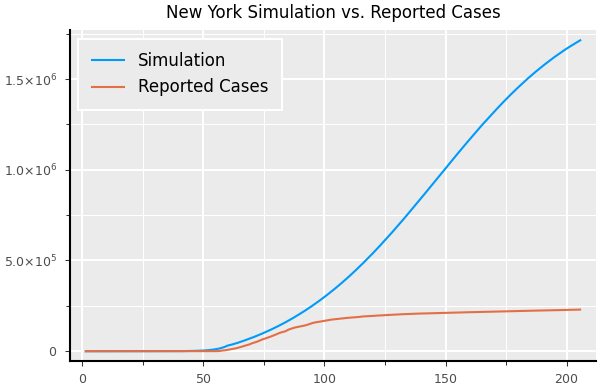

In [805]:
plot(1:n, plotcases, label="Simulation",dpi=150, size=(400,260), tickfontsize=6)
plot!(1:n, tricities[:,:nyc_infected], label="Reported Cases",dpi=150, size=(400,260), tickfontsize=6)
title!("New York Simulation vs. Reported Cases", titlefontsize=8)

In [806]:
plotdeaths = if adjdays >= 0
    series[newyork.fips][:cum][1+adjdays:n+adjdays,map2series.dead[6]] # offset towards past (left)
else
    vcat(zeros(Int, abs(adjdays)),series[newyork.fips][:cum][1:rundays, map2series.dead[6]]) # offset to future and pad left with zeros
end

206-element Array{Int64,1}:
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     ⋮
 16920
 17079
 17252
 17415
 17567
 17721
 17871
 18018
 18177
 18323
 18454
 18604

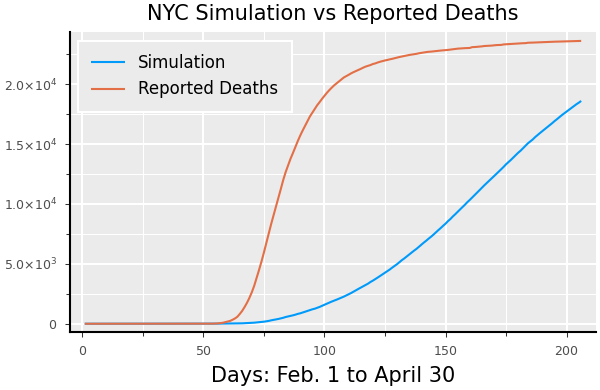

In [807]:
plot(1:n, plotdeaths, label="Simulation",dpi=150, size=(400,260), tickfontsize=6)
plot!(1:n, tricities[:,:nyc_dead], label="Reported Deaths",dpi=150, size=(400,260), tickfontsize=6)
title!("NYC Simulation vs Reported Deaths", titlefontsize=10)
xlabel!("Days: Feb. 1 to April 30", guidefontsize=10)